In [58]:
import numpy as np
import cv2
import io
import PIL.Image
import math
import glob
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython.display import clear_output, Image, display
from keras.models import load_model
from util.WordSegmentation import wordSegmentation, prepareImg
from sklearn.preprocessing import normalize
from natsort import natsorted
from keras.backend.tensorflow_backend import set_session

In [59]:
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
set_session(session)

In [46]:
class_names = [
    "Alef",
    "Ayin",
    "Bet",
    "Dalet",
    "Gimel",
    "He",
    "Het",
    "Kaf",
    "Kaf-final",
    "Lamed",
    "Mem",
    "Mem-medial",
    "Nun-final",
    "Nun-medial",
    "Pe",
    "Pe-final",
    "Qof",
    "Resh",
    "Samekh",
    "Shin",
    "Taw",
    "Tet",
    "Tsadi-final",
    "Tsadi-medial",
    "Waw",
    "Yod",
    "Zayin"
]

In [47]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [48]:
model = load_model('temporary.best.hdf5')
# new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19712)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2523264   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

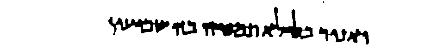

In [49]:
import_images = []
import_images.append(prepareImg(cv2.imread('input_files_word_old/slice4.png'), 50))
showarray(import_images[0])

output_files/image-data/P583-Fg002-R-C01-R01-fused
13
15
12
9
14
9
11
13
9
13
15
11
12
12
11
8
8
10
9
8


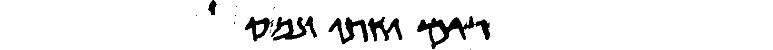

In [50]:
input_files = 'output_files/image-data/'

def load_slices(filepath):
    slices = []
    slices_filepath = filepath + '/'
    slices_path = natsorted(glob.glob(slices_filepath + 'slice*_binarize.png'))
    for slice_path in slices_path:
        slices.append(prepareImg(cv2.imread(slice_path), 50))  
    print(len(slices))
    return slices

image_filepaths = glob.glob(input_files + '*')
print(image_filepaths[len(image_filepaths) - 5])
images = []
for image_filepath in image_filepaths:
    images.append(load_slices(image_filepath))

showarray(images[15][2])

In [51]:
res = []
words = []
for i, img in enumerate(import_images):
    res = wordSegmentation(img, kernelSize=5, sigma=5, theta=7, minArea=30) # fix parameters

In [52]:
for (j, w) in enumerate(res):
    (wordBox, wordImg) = w
    (x, y, w, h) = wordBox
    if (w > 20):
        words.append(wordImg)

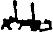

In [53]:
for word in words:
    showarray(word)

In [54]:
word = words[2]
h, w = word.shape
num = 4
chars = []
for i in range(num):
    part = math.floor(w / num)
    char = word[:,part * i:(part * i) + part]
    shape = cv2.resize(char,(32,48))
    ret,thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
    chars.append(thresh1)

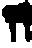

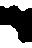

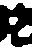

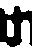

In [55]:
for char in chars:
    showarray(char)

In [56]:
fonts = []
for item in class_names:
    fonts.append(cv2.imread('habbakuk/' + item + '/standard.png'))

(48, 32)
Predicted:  [6.9631678e-10 5.8865300e-08 7.2819712e-03 1.1430592e-09 2.7733520e-17
 1.3871449e-04 1.8058405e-08 4.9544633e-03 1.6305972e-20 1.1029161e-15
 2.4443327e-01 1.3057042e-08 1.5099527e-16 1.5966721e-09 1.1517186e-06
 4.1600600e-15 3.7299695e-03 7.2323974e-12 1.8283329e+01 2.6539901e-01
 1.0190193e-08 8.1190727e+01 4.5363495e-16 6.3386579e-10 8.4853946e-10
 2.8157167e-16 8.4065794e-27]
Index of class with highest probability:  21
Value of highest probability:  0.8119073
Name of predicted class:  Tet
habbabuk/Tet/standard.png


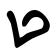

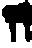

(48, 32)
Predicted:  [1.08866607e-05 6.21012296e-04 2.74861221e+01 1.09985401e-03
 5.48552759e-10 9.95588452e-02 4.62841672e-05 2.04809380e+01
 3.56288443e-09 3.67193621e-07 1.64313555e+00 4.91401297e-04
 3.19605253e-09 1.11770962e-04 2.86894534e-02 7.05896284e-08
 1.07485285e+01 7.98780457e-05 3.58452377e+01 4.74402308e-03
 5.77976694e-04 3.65833974e+00 2.83995348e-07 2.14683569e-05
 1.62985467e-03 2.99452232e-08 1.75341343e-14]
Index of class with highest probability:  18
Value of highest probability:  0.35845238
Name of predicted class:  Samekh
habbabuk/Samekh/standard.png


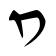

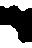

(48, 32)
Predicted:  [1.21042874e-07 3.17983040e-06 7.03351822e+01 9.45635384e-06
 1.16298585e-11 5.49677585e-04 4.24068958e-08 1.87206841e+01
 1.16073219e-11 2.25687025e-08 1.94612312e+00 5.26252334e-05
 1.82285603e-10 1.80450934e-05 3.11193690e-02 2.56890273e-11
 2.80114412e-02 9.09189623e-07 5.57855034e+00 1.63958161e-04
 3.53684183e-04 3.35912251e+00 1.23518053e-11 6.25891744e-06
 4.70688792e-05 4.91118743e-11 2.46776804e-18]
Index of class with highest probability:  2
Value of highest probability:  0.70335186
Name of predicted class:  Bet
habbabuk/Bet/standard.png


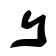

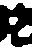

(48, 32)
Predicted:  [4.4251333e-06 1.2832609e-04 4.2269791e+01 6.7611560e-05 3.9005510e-10
 6.6076973e-03 4.8060624e-06 1.5775945e+01 2.7998165e-10 1.2657482e-07
 1.4098096e+00 3.6415571e-04 9.6999004e-09 1.3061224e-04 3.3234365e-02
 9.0591457e-10 5.5250853e-01 4.2037600e-06 2.7727682e+01 1.3524382e-02
 1.1949263e-03 1.2208447e+01 5.7470122e-09 1.2997654e-04 4.1914909e-04
 3.8006225e-09 9.5605826e-16]
Index of class with highest probability:  2
Value of highest probability:  0.4226979
Name of predicted class:  Bet
habbabuk/Bet/standard.png


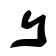

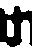

In [57]:
for char in chars:
#     char_pred = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
    char_pred = np.asarray(char[:], dtype='float32')
    print(char_pred.shape)
    char_pred = normalize(char_pred)
    char_pred = char_pred.reshape(-1, 48, 32,1)

    prediction = model.predict([char_pred])
    for i in range(len(prediction)):
        print('Predicted: ', prediction[i] * 100)
    highest_index = np.argmax(prediction)
    print('Index of class with highest probability: ',highest_index)
    print('Value of highest probability: ', prediction[0][highest_index])
    print('Name of predicted class: ', class_names[highest_index])
    print('habbabuk/' + class_names[highest_index] + '/standard.png')
    character_example = cv2.imread('habbakuk/' + str(class_names[highest_index]) + '/standard.png')
    showarray(character_example)
    showarray(char)

In [95]:
# for box in bounding_boxes:
#     xStart = box[2]
#     xEnd = box[0]
#     y = box[1]
#     winH = box[3] - y
#     winWidth = 5
#     while(xStart-winWidth >= xEnd) :
#         hit = False
#         winW = winWidth
#         a = 0
#         # While the image is not classified and the box has not reached the edge,
#         # increase window size
#         while(not hit and xStart-winW >= xEnd) :
#             newX = xStart - winW
#             # Draw the window
#             clone = img.copy()
#             cv2.rectangle(clone, (xStart, y), (newX, y + winH), (255, 0, 0), 2)
#             cv2.rectangle(clone, (xStart,y),(xEnd,y + winH), (0,255,0), 2)
#             cv2.imshow("Window", clone)
#             cv2.waitKey(0)
#             # Check if the CNN returns a high probability for a letter
#             # for prob in probabilities :
#             #     if prob >= 0.75 :
#             #         hit = True
#             #         xStart = newX
#             # # Increase size of window if nothing has been found
#             winW += 5
#             # this is done to ensure that the loop ends for now, because not
#             # connected to cnn yet.
#             hit = True
#             xStart = newX

In [49]:
# def get_resized_img(img, video_size):
#     width, height = video_size  # these are the MAX dimensions
#     video_ratio = width / height
#     img_ratio = img.size[0] / img.size[1]
#     if video_ratio >= 1:  # the video is wide
#         if img_ratio <= video_ratio:  # image is not wide enough
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#         else:  # image is wider than video
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#     else:  # the video is tall
#         if img_ratio >= video_ratio:  # image is not tall enough
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#         else:  # image is taller than video
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#     return np.asarray(img.resize(size_new, resample=Image.LANCZOS))

In [ ]:
# char = cv2.cvtColor(char, char, cv2.COLOR_BGR2GRAY)

NameError: name 'python' is not defined